Matrix Completion method

## 1. Import necessary libraries 

In [31]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


## 2. Load the Data 

In [32]:
# Load the dataset
df = pd.read_csv("C:\\Users\\Sowmy\\Downloads\\final_Dataset_Cleaned.csv")

# Show first few rows
df


,country_id,country_name,country_code,cause_id,cause_name,year,mortality_rate,corruption_index,physicians_per_1000,beds_per_1000,health_expenditure_per_capita,percent_gdp_spent_on_healthcare,happinessscore
0,160,Afghanistan,AFG,688,Transport injuries,2010,27.601971,0.958,0.245,0.43,148.761110,8.569672,4.258
1,160,Afghanistan,AFG,957,Enteric infections,2010,36.597126,0.958,0.245,0.43,148.761110,8.569672,4.258
2,160,Afghanistan,AFG,956,Respiratory infections and tuberculosis,2010,120.676177,0.958,0.245,0.43,148.761110,8.569672,4.258
3,160,Afghanistan,AFG,955,HIV/AIDS and sexually transmitted infections,2010,1.806461,0.958,0.245,0.43,148.761110,8.569672,4.258
4,160,Afghanistan,AFG,717,Self-harm and interpersonal violence,2010,54.353014,0.958,0.245,0.43,148.761110,8.569672,4.258
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36640,198,Zimbabwe,ZWE,508,Chronic respiratory diseases,2021,20.468769,0.826,0.189,2.00,63.136967,2.785717,2.995
36641,198,Zimbabwe,ZWE,688,Transport injuries,2021,20.355806,0.826,0.189,2.00,63.136967,2.785717,2.995
36642,198,Zimbabwe,ZWE,386,Nutritional deficiencies,2021,18.741692,0.826,0.189,2.00,63.136967,2.785717,2.995
36643,198,Zimbabwe,ZWE,542,Neurological disorders,2021,9.387665,0.826,0.189,2.00,63.136967,2.785717,2.995


In [33]:
# Reference columns for interpretation
reference_columns = ['country_name', 'cause_name', 'year']

# Numeric columns for unsupervised learning
numeric_columns = ['mortality_rate', 'corruption_index', 'physicians_per_1000',
                   'beds_per_1000', 'health_expenditure_per_capita',
                   'percent_gdp_spent_on_healthcare', 'happinessscore']

# Extract numeric data
X = df[numeric_columns].copy()

# Scale the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns)

# Add back reference columns
X_scaled_df[reference_columns] = df[reference_columns].reset_index(drop=True)

# show the dataframe
X_scaled_df.head()

,mortality_rate,corruption_index,physicians_per_1000,beds_per_1000,health_expenditure_per_capita,percent_gdp_spent_on_healthcare,happinessscore,country_name,cause_name,year
0,-0.130716,1.572144,-1.024008,-1.032439,-0.763959,0.753171,-1.06866,Afghanistan,Transport injuries,2010
1,-0.015358,1.572144,-1.024008,-1.032439,-0.763959,0.753171,-1.06866,Afghanistan,Enteric infections,2010
2,1.062905,1.572144,-1.024008,-1.032439,-0.763959,0.753171,-1.06866,Afghanistan,Respiratory infections and tuberculosis,2010
3,-0.461528,1.572144,-1.024008,-1.032439,-0.763959,0.753171,-1.06866,Afghanistan,HIV/AIDS and sexually transmitted infections,2010
4,0.212350,1.572144,-1.024008,-1.032439,-0.763959,0.753171,-1.06866,Afghanistan,Self-harm and interpersonal violence,2010


## 3. PCA Analysis

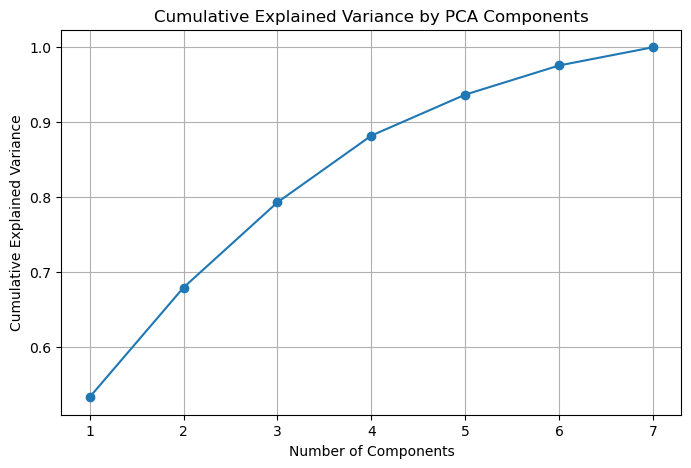

In [34]:
# Fit PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variance_ratio)


#  Cumulative Explained Variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


The cumulative Explained Variance plot shows that the first four principal components captures approximately 88% of the total variance in the dataset. After 4th component the other components are giving little information so reducing data to first 4 principal components would be useful  for clustering.

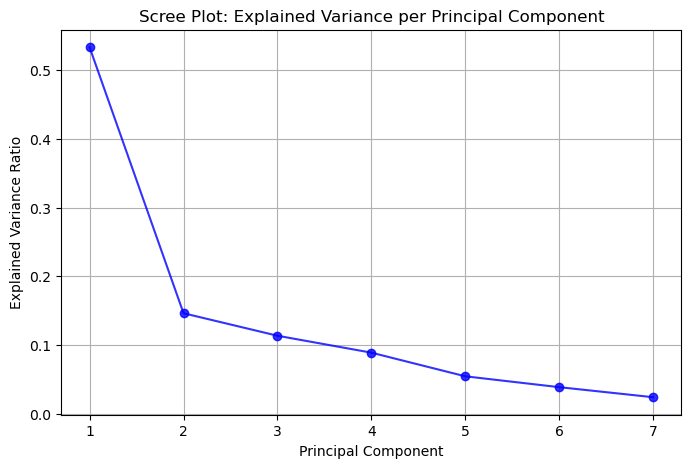

In [35]:
# Scree plot 
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance_ratio)+1), 
         explained_variance_ratio, 
         marker='o', linestyle='-', color='b', alpha=0.8)
plt.title('Scree Plot: Explained Variance per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


The abbove scree plot shows a large drop after the first principal components (53%), with the second component contributing about 15%. While there is noticeable drop at PC2, the explained variance continues to decreade gradually with PC3 (11%) and PC4(9%). After the fourth component the curve is flat . Therefore four components are would be useful for clustering.

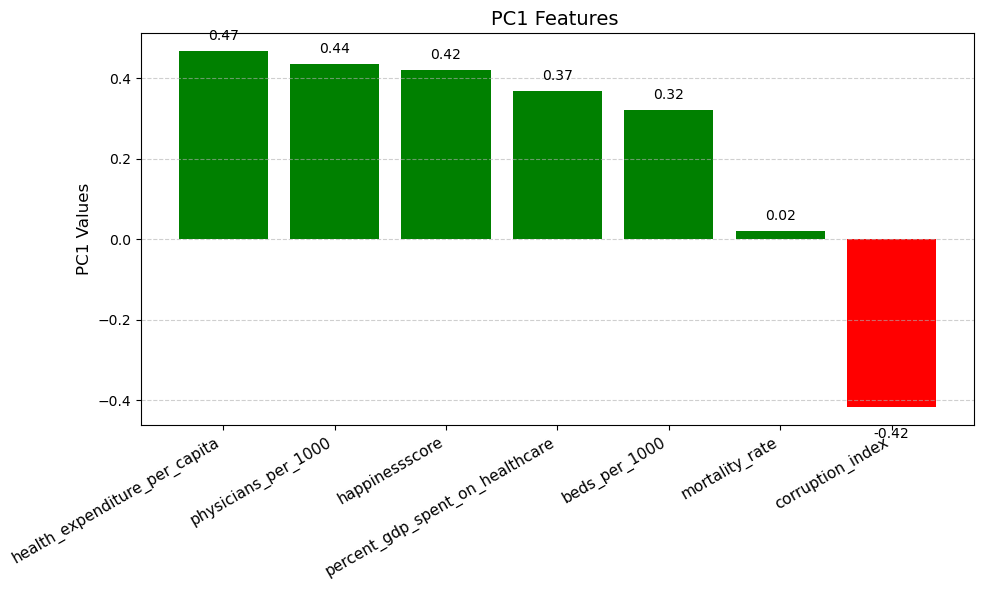

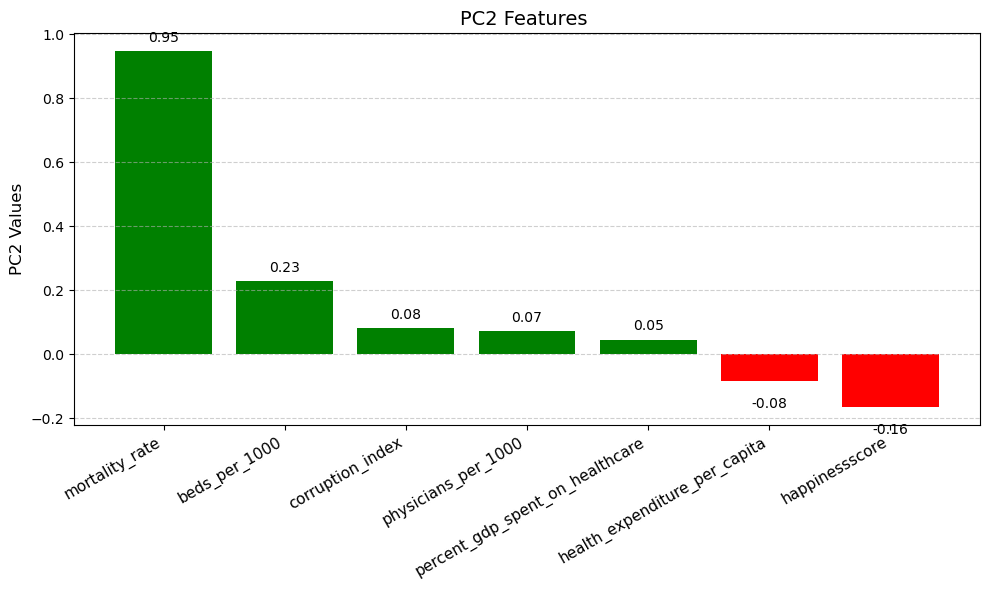

In [36]:
# pca features
def plot_pca_loadings(pca, component_number, feature_names):
    # Get component loadings:
    loadings = pca.components_[component_number]

    # Pair with feature names:
    loading_tuples = list(zip(feature_names, loadings))

    # Sort by loading value:
    loading_tuples_sorted = sorted(loading_tuples, key=lambda x: x[1], reverse=True)

    # Prepare:
    features_sorted = [x[0] for x in loading_tuples_sorted]
    loadings_sorted = [x[1] for x in loading_tuples_sorted]

    # Plot:
    plt.figure(figsize=(10, 6))
    bars = plt.bar(features_sorted, loadings_sorted, color=['green' if v >= 0 else 'red' for v in loadings_sorted])

    # Add value labels:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 height + 0.02 if height >= 0 else height - 0.05, 
                 f'{height:.2f}', ha='center', va='bottom' if height >= 0 else 'top', fontsize=10)

    plt.ylabel(f"PC{component_number + 1} Values", fontsize=12)
    plt.xticks(rotation=30, ha='right', fontsize=11)
    plt.title(f"PC{component_number + 1} Features ", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_pca_loadings(pca, component_number=0, feature_names=numeric_columns)
plot_pca_loadings(pca, component_number=1, feature_names=numeric_columns)


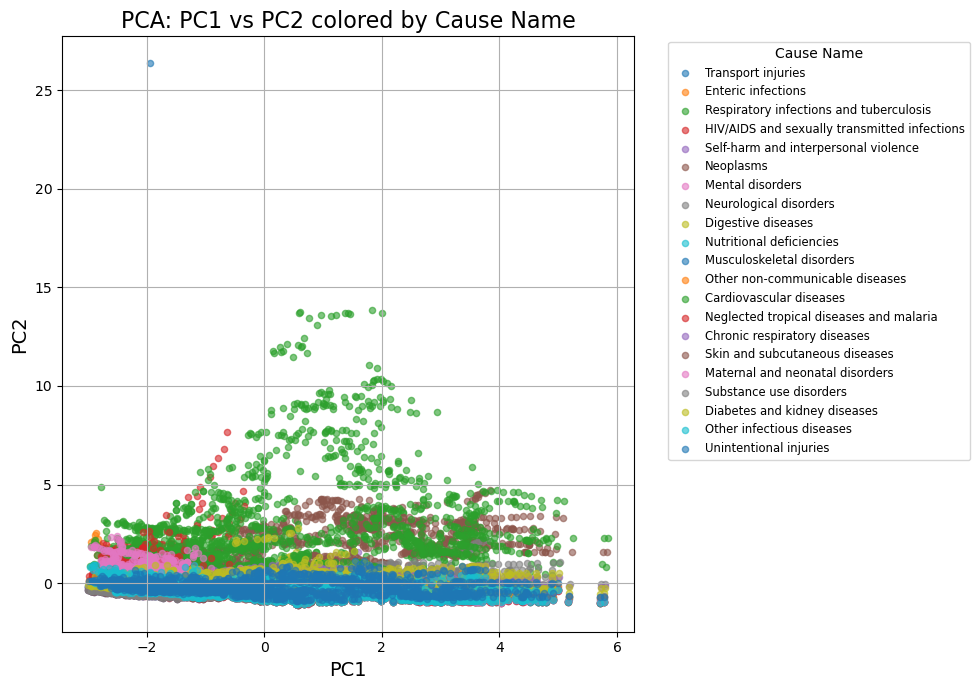

In [37]:
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'cause_name': df['cause_name'].values  
})
plt.figure(figsize=(10, 7))
for cause in pca_df['cause_name'].unique():
    subset = pca_df[pca_df['cause_name'] == cause]
    plt.scatter(subset['PC1'], subset['PC2'], label=cause, alpha=0.6, s=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Cause Name')
plt.title('PCA: PC1 vs PC2 colored by Cause Name', fontsize=16)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


This plot shows how different diseases are spread out based on healthcare factors, like health spending, number of doctors, and mortality rates. Some diseases appear in many types of healthcare systems, while others are more alike.

## 4. K means clustering

  File "C:\Users\Sowmy\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Sowmy\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sowmy\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Sowmy\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


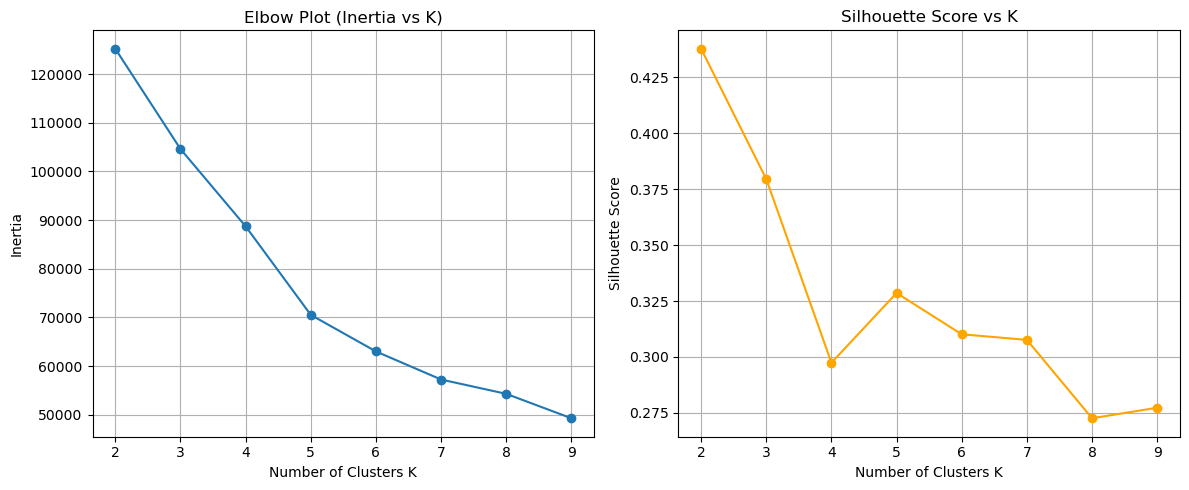

In [13]:
# Use first 4 PCs based on Scree Plot and explained variance
X_cluster = X_pca[:, :4]

#Elbow Plot + Silhouette Score → to choose best K:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
k_range = range(2, 10)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, labels))

# Plot Inertia (Elbow Plot)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Plot (Inertia vs K)")
plt.xlabel("Number of Clusters K")
plt.ylabel("Inertia")
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1,2,2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters K")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()


From the above plot we can see that inertia decreses steadily as K increases. The elbow appears around K = 5 since after 5 it does not improve things much. 

The highest silhouette score is at 2 but 2 may oversimplify the structure and the next local peak is at k =5. so K = 5 will be the good choice.

In [14]:
# Fit KMeans with chosen K
kmeans_final = KMeans(n_clusters=5, random_state=42, n_init=10)
final_labels = kmeans_final.fit_predict(X_cluster)

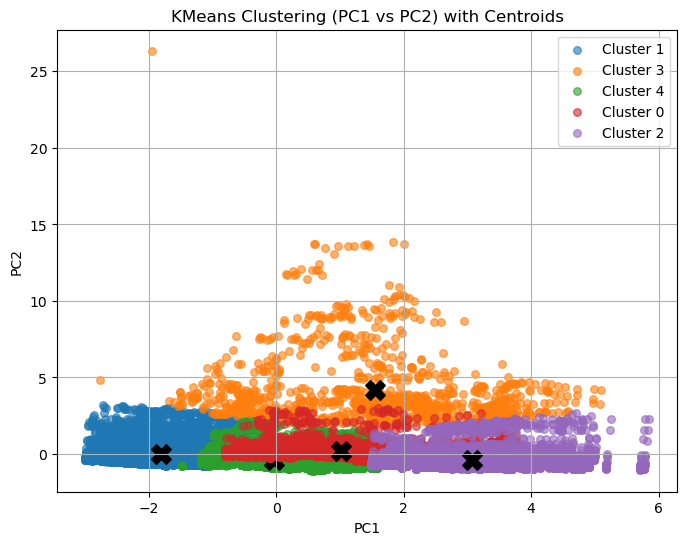

In [15]:
# Create a new dataframe with cluster labels
pca_df_cluster = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': final_labels
})

plt.figure(figsize=(8,6))

# Plot each cluster
for cluster in pca_df_cluster['Cluster'].unique():
    subset = pca_df_cluster[pca_df_cluster['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.6, s=30)

    # Compute centroid
    centroid_x = subset['PC1'].mean()
    centroid_y = subset['PC2'].mean()

    # Plot centroid as a big red X
    plt.scatter(centroid_x, centroid_y, marker='X', color='black', s=200, edgecolor='black')

plt.legend()
plt.title('KMeans Clustering (PC1 vs PC2) with Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()



Cluster 0
mortality_rate: 18.61
corruption_index: 0.45
physicians_per_1000: 3.44
beds_per_1000: 6.22
health_expenditure_per_capita: 1579.24
percent_gdp_spent_on_healthcare: 7.34
happinessscore: 5.46
Cluster: 0.00

Cluster 1
mortality_rate: 36.10
corruption_index: 0.71
physicians_per_1000: 0.45
beds_per_1000: 1.26
health_expenditure_per_capita: 262.22
percent_gdp_spent_on_healthcare: 5.16
happinessscore: 4.49
Cluster: 1.00

Cluster 2
mortality_rate: 25.86
corruption_index: 0.06
physicians_per_1000: 3.78
beds_per_1000: 3.89
health_expenditure_per_capita: 4840.08
percent_gdp_spent_on_healthcare: 9.86
happinessscore: 6.97
Cluster: 2.00

Cluster 3
mortality_rate: 371.56
corruption_index: 0.31
physicians_per_1000: 3.35
beds_per_1000: 4.78
health_expenditure_per_capita: 2419.95
percent_gdp_spent_on_healthcare: 8.00
happinessscore: 5.87
Cluster: 3.00

Cluster 4
mortality_rate: 20.65
corruption_index: 0.42
physicians_per_1000: 1.79
beds_per_1000: 2.02
health_expenditure_per_capita: 1330.23
per

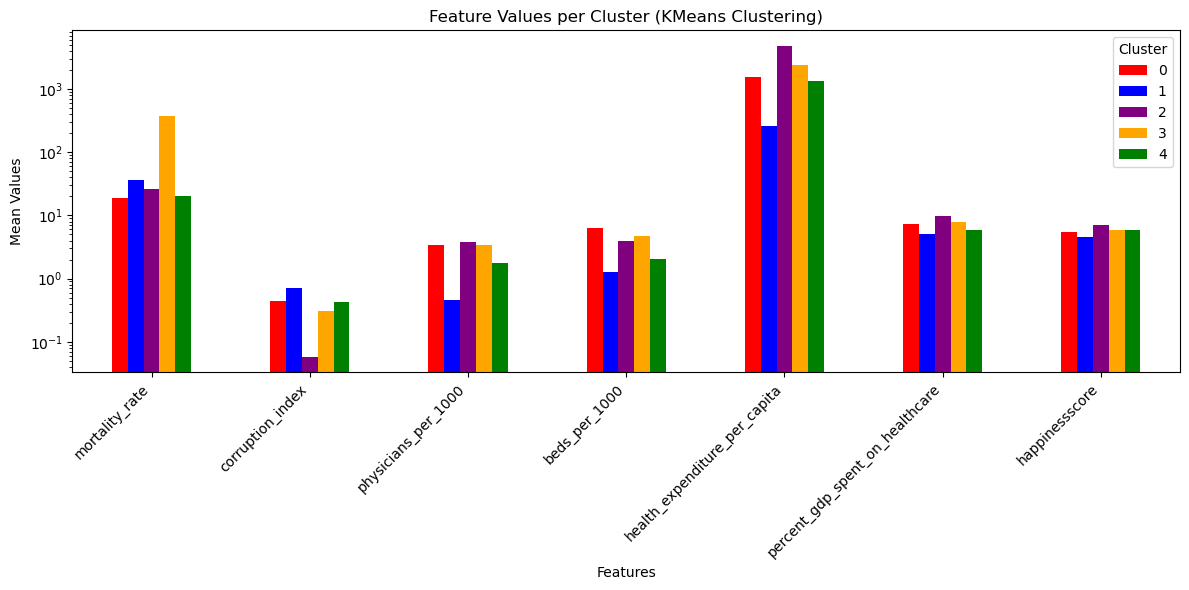

In [40]:
# Add KMeans cluster labels to df
df['KMeans_Cluster'] = final_labels  

# List of numerical columns
num_cols = [
    'mortality_rate', 'corruption_index', 'physicians_per_1000', 'beds_per_1000',
    'health_expenditure_per_capita', 'percent_gdp_spent_on_healthcare', 'happinessscore'
]

# Print mean values per cluster (formatted as you want)
for cluster_id in sorted(df['KMeans_Cluster'].unique()):
    print(f"\nCluster {cluster_id}")  
    
    cluster_data = df[df['KMeans_Cluster'] == cluster_id]
    
    for col in num_cols:
        mean_value = cluster_data[col].mean()
        print(f"{col}: {mean_value:.2f}")
        
    print(f"Cluster: {cluster_id:.2f}")  

# Prepare cluster means dataframe
cluster_means = df.groupby('KMeans_Cluster')[num_cols].mean()

# Transpose the dataframe
cluster_means_T = cluster_means.T


cluster_colors = {0: 'red', 1: 'blue', 2: 'purple', 3: 'orange', 4: 'green'}

# Bar plot
ax = cluster_means_T.plot(kind='bar', figsize=(12,6), 
                          color=[cluster_colors[cluster] for cluster in cluster_means_T.columns])

# Title and labels
plt.title("Feature Values per Cluster (KMeans Clustering)")
plt.ylabel("Mean Values")
plt.xlabel("Features")
plt.yscale('log')  
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', loc='upper right')

plt.tight_layout()
plt.show()


In [20]:
print("\nCountries per KMeans Cluster:")
for cluster_id in sorted(df['Cluster'].unique()):
    countries = df[df['Cluster'] == cluster_id]['country_name'].unique()
    print(f"\nCluster {cluster_id} ({len(countries)} countries):")
    print(", ".join(sorted(countries)))



Countries per KMeans Cluster:

Cluster 0 (34 countries):
Argentina, Armenia, Azerbaijan, Belarus, Bulgaria, China, Croatia, Cuba, Czechia, Estonia, Georgia, Greece, Hungary, Japan, Kazakhstan, Kyrgyzstan, Latvia, Lebanon, Lithuania, Maldives, Malta, Mongolia, North Macedonia, Poland, Portugal, Republic of Korea, Republic of Moldova, Romania, Serbia, Slovakia, Slovenia, Tajikistan, Ukraine, Uzbekistan

Cluster 1 (70 countries):
Afghanistan, Albania, Algeria, Angola, Azerbaijan, Bangladesh, Benin, Bolivia (Plurinational State of), Bosnia and Herzegovina, Botswana, Burkina Faso, Burundi, Cambodia, Cameroon, Central African Republic, Chad, China, Comoros, Djibouti, Dominican Republic, Ecuador, Egypt, Eswatini, Ethiopia, Gabon, Gambia, Ghana, Guatemala, Guinea, Haiti, Honduras, India, Indonesia, Iran (Islamic Republic of), Iraq, Jordan, Kenya, Kyrgyzstan, Lao People's Democratic Republic, Lebanon, Liberia, Madagascar, Malawi, Malaysia, Mali, Morocco, Mozambique, Myanmar, Nepal, Nicaragua, 

In [21]:
#diseases
for cluster_id in sorted(df['Cluster'].unique()):
    print(f"\nCluster {cluster_id}: Top Causes")
    cause_counts = df[df['Cluster'] == cluster_id]['cause_name'].value_counts().head(10)
    for cause, count in cause_counts.items():
        print(f"{cause}")



Cluster 0: Top Causes
Musculoskeletal disorders
Mental disorders
Nutritional deficiencies
Neglected tropical diseases and malaria
HIV/AIDS and sexually transmitted infections
Substance use disorders
Enteric infections
Skin and subcutaneous diseases
Other infectious diseases
Other non-communicable diseases

Cluster 1: Top Causes
Neoplasms
Diabetes and kidney diseases
Respiratory infections and tuberculosis
Cardiovascular diseases
Digestive diseases
Maternal and neonatal disorders
Chronic respiratory diseases
Self-harm and interpersonal violence
Neurological disorders
Transport injuries

Cluster 2: Top Causes
Neurological disorders
Chronic respiratory diseases
Digestive diseases
Diabetes and kidney diseases
Self-harm and interpersonal violence
Transport injuries
Other non-communicable diseases
Unintentional injuries
Enteric infections
Substance use disorders

Cluster 3: Top Causes
Cardiovascular diseases
Neoplasms
Respiratory infections and tuberculosis
HIV/AIDS and sexually transmitted

1.  Cluster 0: Countries with good healthcare resources (high number of physicians and beds), moderate healthcare spending, and low mortality. These are mostly upper-middle-income countries in Eastern Europe and Central Asia, such as Maldives, Poland, and Korea.

2.  Cluster 1: Countries with high mortality, poor healthcare resources (few doctors and beds), low healthcare spending, and low happiness. This cluster clearly represents low-income and developing countries, mostly from Africa, South Asia, and Southeast Asia.

3. Cluster 2: Countries with excellent healthcare systems, highest healthcare spending, lowest corruption, low mortality, and highest happiness scores. These are the most developed countries in the world, including Western Europe, North America, Australia, and Nordic countries.

4. Cluster 3: A mixed cluster of countries with good healthcare resources, moderate to high healthcare spending, but surprisingly high mortality in some cases. This may reflect countries where non-healthcare factors (such as lifestyle, inequality, or public health issues) are driving higher mortality despite good medical infrastructure.

5. Cluster 4: Countries with moderate healthcare resources, moderate spending, and moderate mortality and  developing countries that are improving their healthcare systems. Examples include countries from Latin America, Middle East, and Southeast Asia.

## 5. Hierarchical Clustering


 WARD LINKAGE 


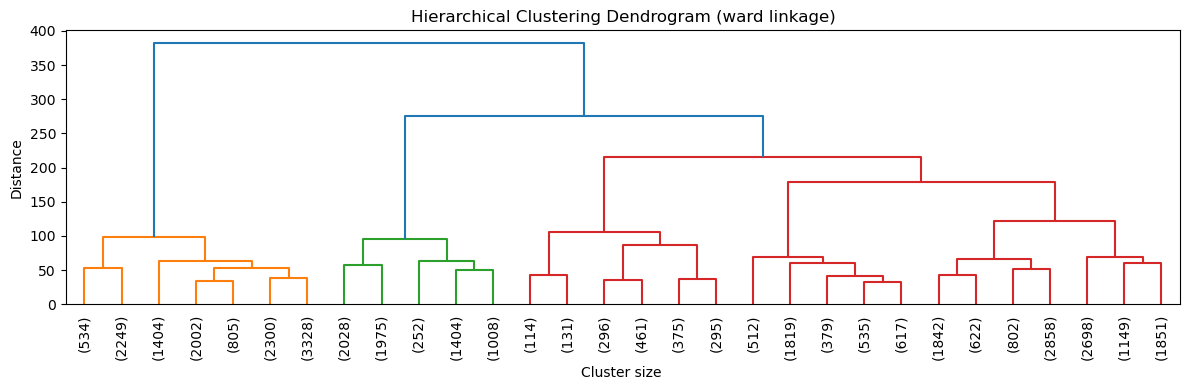


 COMPLETE LINKAGE 


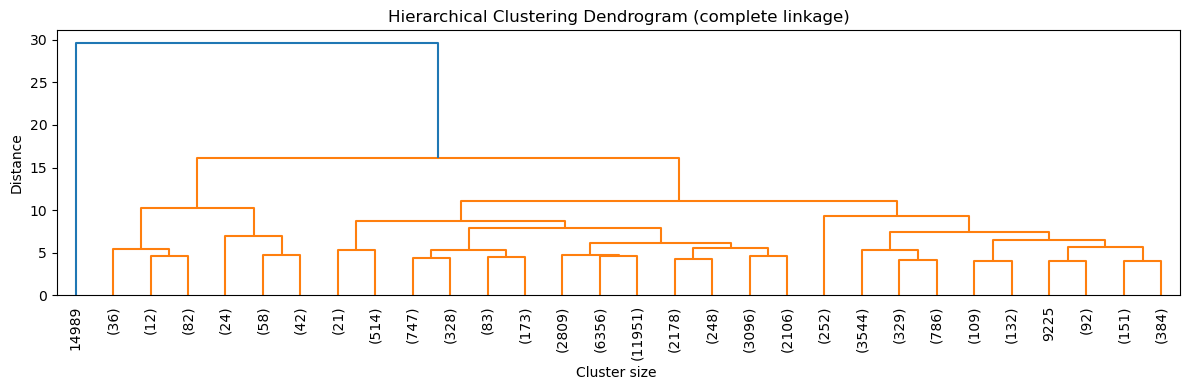


 AVERAGE LINKAGE 


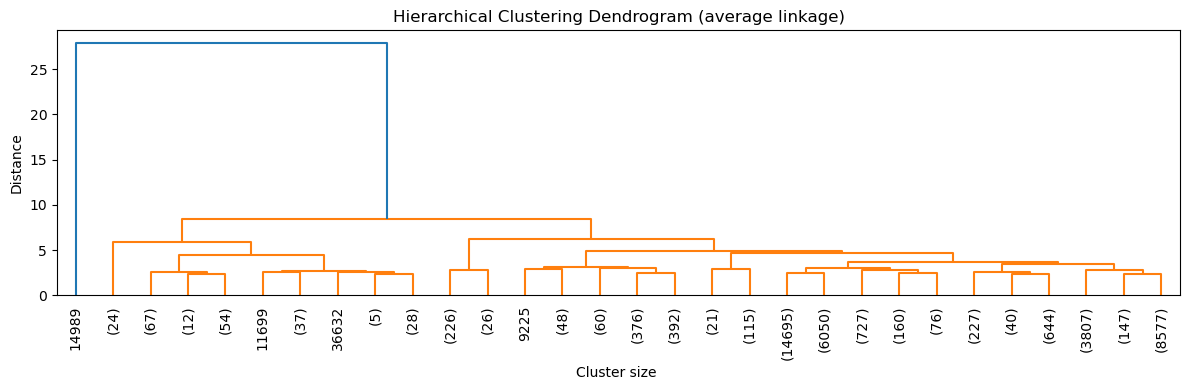


 SINGLE LINKAGE 


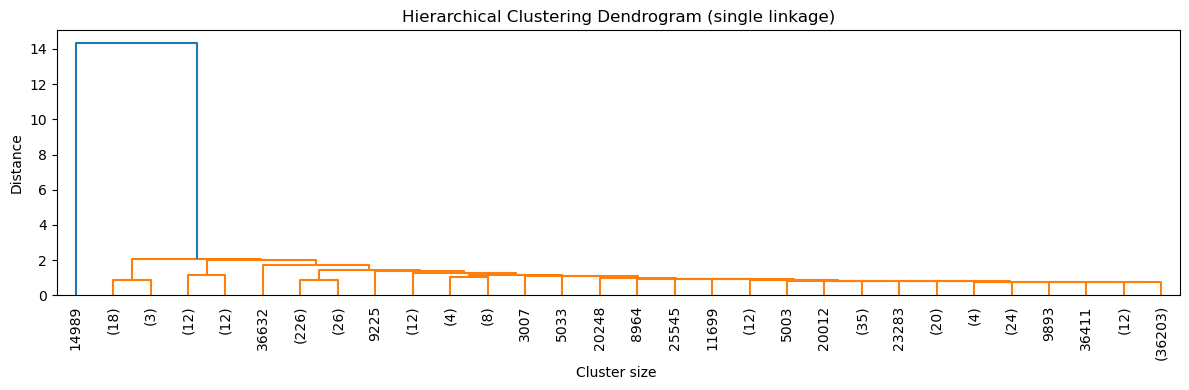

In [24]:

# List of linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method
for method in linkage_methods:
    print(f"\n {method.upper()} LINKAGE ")
    
    # Compute linkage
    Z = linkage(X_cluster, method=method)
    
    # Plot dendrogram 
    plt.figure(figsize=(12, 4))
    plt.title(f"Hierarchical Clustering Dendrogram ({method} linkage)")
    dendrogram(Z, 
               truncate_mode='lastp', 
               p=30, 
               leaf_rotation=90., 
               leaf_font_size=10.)
    plt.xlabel("Cluster size ")
    plt.ylabel("Distance")
    plt.tight_layout()
    plt.show()
    

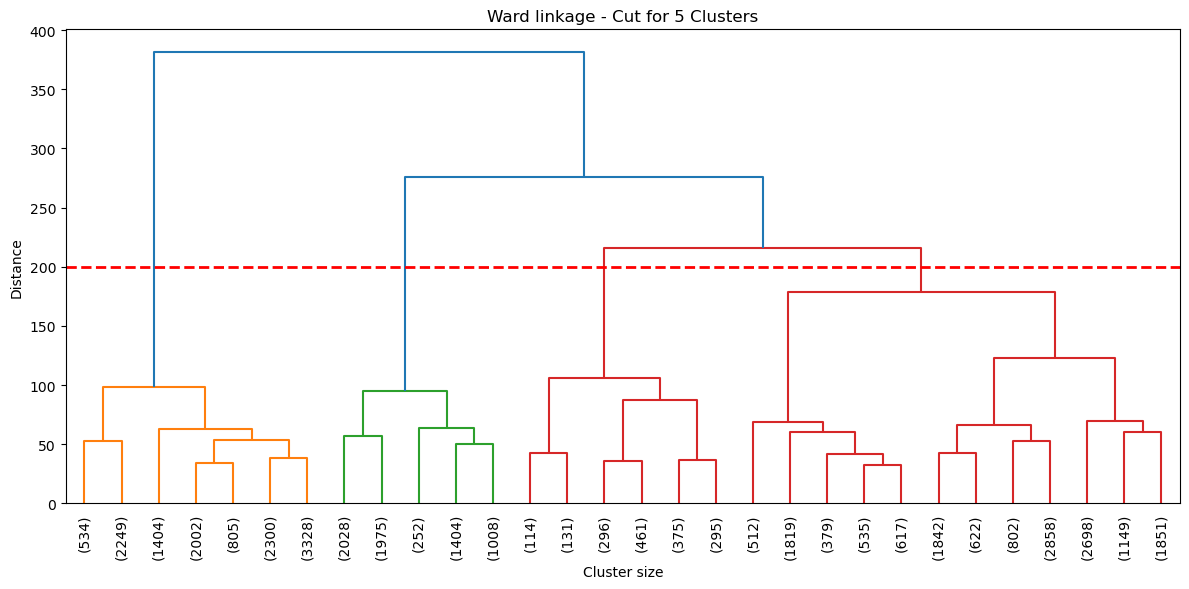

In [27]:
#ward dendrogram
Z = linkage(X_cluster, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z,
           truncate_mode='lastp',  
           p=30,
           leaf_rotation=90.,
           leaf_font_size=10.)

# Plot horizontal line to show cut 
plt.axhline(y=200, color='red', linestyle='--', linewidth=2)

plt.title('Ward linkage - Cut for 5 Clusters')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()



Cluster 0
mortality_rate: 36.26
corruption_index: 0.71
physicians_per_1000: 0.30
beds_per_1000: 0.96
health_expenditure_per_capita: 208.90
percent_gdp_spent_on_healthcare: 5.15
happinessscore: 4.45
Cluster: 0.00

Cluster 1
mortality_rate: 17.81
corruption_index: 0.08
physicians_per_1000: 3.74
beds_per_1000: 3.90
health_expenditure_per_capita: 4564.41
percent_gdp_spent_on_healthcare: 9.65
happinessscore: 6.85
Cluster: 1.00

Cluster 2
mortality_rate: 312.71
corruption_index: 0.35
physicians_per_1000: 3.01
beds_per_1000: 4.41
health_expenditure_per_capita: 2416.46
percent_gdp_spent_on_healthcare: 7.76
happinessscore: 5.85
Cluster: 2.00

Cluster 3
mortality_rate: 15.86
corruption_index: 0.36
physicians_per_1000: 3.74
beds_per_1000: 7.19
health_expenditure_per_capita: 1805.92
percent_gdp_spent_on_healthcare: 6.91
happinessscore: 5.55
Cluster: 3.00

Cluster 4
mortality_rate: 18.98
corruption_index: 0.52
physicians_per_1000: 1.87
beds_per_1000: 2.62
health_expenditure_per_capita: 1123.17
per

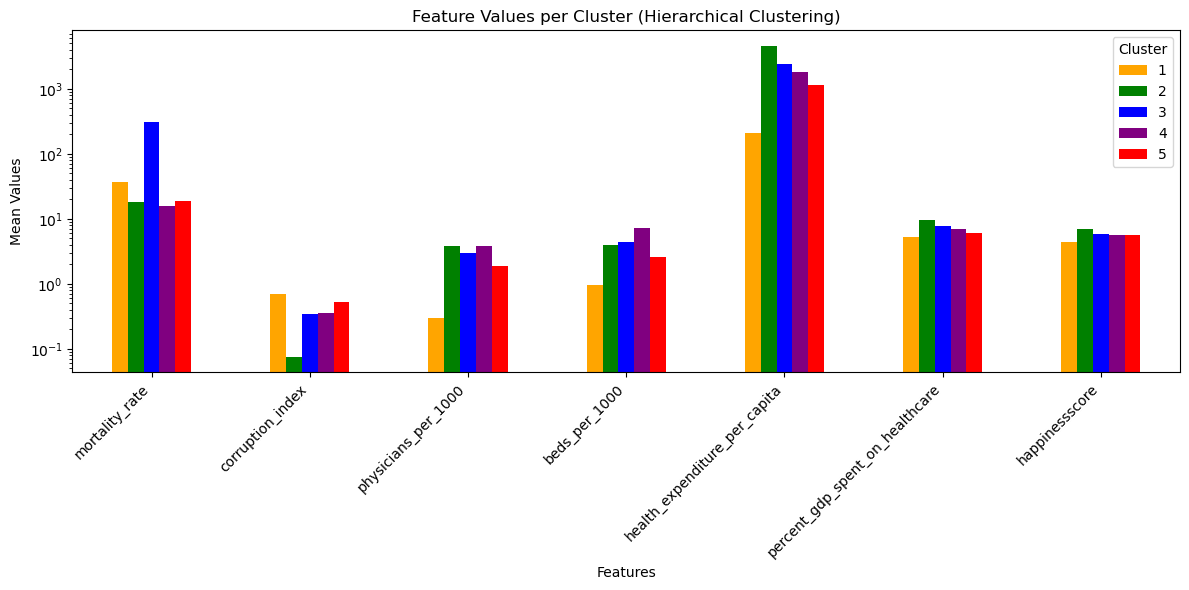

In [29]:
# Extract 5 cluster labels
hierarchical_labels = fcluster(Z, t=5, criterion='maxclust')
df['Hierarchical_Ward_Cluster'] = hierarchical_labels

# List of numerical columns 
num_cols = [
    'mortality_rate', 'corruption_index', 'physicians_per_1000', 'beds_per_1000',
    'health_expenditure_per_capita', 'percent_gdp_spent_on_healthcare', 'happinessscore'
]

# Print mean values per cluster
for cluster_id in sorted(df['Hierarchical_Ward_Cluster'].unique()):
    print(f"\nCluster {cluster_id - 1}")  
    
    cluster_data = df[df['Hierarchical_Ward_Cluster'] == cluster_id]
    
    for col in num_cols:
        mean_value = cluster_data[col].mean()
        print(f"{col}: {mean_value:.2f}")
        
    print(f"Cluster: {cluster_id - 1:.2f}")  

# Prepare cluster means dataframe
cluster_means = df.groupby('Hierarchical_Ward_Cluster')[num_cols].mean()

# Transpose the dataframe 
cluster_means_T = cluster_means.T

# Define cluster_colors dictionary for 5 clusters (IMPORTANT fix for your KeyError)
cluster_colors = {1: 'orange', 2: 'green', 3: 'blue', 4: 'purple', 5: 'red'}

# Bar plot
ax = cluster_means_T.plot(kind='bar', figsize=(12,6), 
                          color=[cluster_colors[cluster] for cluster in cluster_means_T.columns])

# Title and labels
plt.title("Feature Values per Cluster (Hierarchical Clustering)")
plt.ylabel("Mean Values")
plt.xlabel("Features")
plt.yscale('log')  
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', loc='upper right')

plt.tight_layout()
plt.show()


In [30]:
# Hierarchical Ward Clusters
print("\nCountries per Hierarchical Ward Cluster:")
for cluster_id in sorted(df['Hierarchical_Ward_Cluster'].unique()):
    countries = df[df['Hierarchical_Ward_Cluster'] == cluster_id]['country_name'].unique()
    print(f"\nCluster {cluster_id - 1} ({len(countries)} countries):")
    print(", ".join(sorted(countries)))


Countries per Hierarchical Ward Cluster:

Cluster 0 (61 countries):
Afghanistan, Algeria, Angola, Bangladesh, Benin, Bhutan, Bolivia (Plurinational State of), Botswana, Burkina Faso, Burundi, Cambodia, Cameroon, Central African Republic, Chad, China, Comoros, Djibouti, Dominican Republic, Ecuador, Egypt, Eswatini, Ethiopia, Gabon, Gambia, Ghana, Guatemala, Guinea, Haiti, Honduras, India, Indonesia, Iran (Islamic Republic of), Iraq, Kenya, Lao People's Democratic Republic, Liberia, Madagascar, Malawi, Malaysia, Mali, Morocco, Mozambique, Myanmar, Nepal, Nicaragua, Niger, Pakistan, Paraguay, Peru, Philippines, Rwanda, Senegal, Sudan, Thailand, Togo, Tunisia, Uganda, United Republic of Tanzania, Viet Nam, Zambia, Zimbabwe

Cluster 1 (37 countries):
Argentina, Australia, Austria, Belgium, Canada, Chile, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Georgia, Germany, Greece, Iceland, Ireland, Israel, Italy, Latvia, Luxembourg, Malta, Netherlands, New Zealand, Norway, Portuga


1.Cluster 1 includes the world’s most developed countries, with excellent healthcare, low death rates, and high happiness (like the USA, Western Europe, and Nordic countries).

2. Cluster 0 contains poorer developing countries with weak healthcare, high death rates, and lower happiness (many countries in Africa and South Asia).
   
3. Cluster 2 is a big mix of countries with different levels of healthcare and happiness — this group includes both middle-income countries and those in transition.
   
4. Cluster 3 mainly consists of Eastern European and Central Asian countries. They have decent healthcare systems but still high death rates, possibly due to lifestyle or public health issues.

5. Cluster 4 includes many upper-middle-income countries, with decent healthcare, average happiness, and healthcare systems that are still improving (such as countries in Latin America, the Middle East, and Southeast Asia).